# Авторство разных частей романа "Мастер и Маргарита"

## Команда
* Дмитриева Анна (PyDelta, описание работы)
* Краснов Станислав (подготовка источников, PyDelta, описание работы)

## Цель работы
Как известно, художественные тексты можно оценивать не только с точки зрения вклада автора в мировую литературу, но и с позиций статистического анализа. На этот факт указывают исследования, подтверждающие, что набор наиболее употребительных слов и соотношение их частот в текстах значительно разнится у разных авторов (Evert, Proisl, 2017).

В настоящей работе данный принцип используется в качестве теоретического основания для применения методов стилометрии, а более предметно – определения авторства разных частей романа "Мастер и Маргарита". Две части романа – повествующая о событиях в Москве и рассказывающая историю Понтия Пилата – конвенционально приписываются перу М. А. Булгакова, однако с точки зрения стилевого оформления это недостаточно очевидно, и существует предположение, что части написаны разными авторами. Проверить данную гипотезу и есть задача этого стилеметрического эксперимента.

## Данные
Главы романа "Мастер и Маргарита" были распределены в два отдельных файла согласно тому, относятся они к московским эпизодам или к событиям книги об Иешуа Га-Ноцри. Изначально файлы оказались ненормированными по длине, однако последующее выделение ограниченного количества признаков кластеризации для каждого текста позволило сбалансировать разновеликие отрывки романа. Затем, чтобы реализовать кластерный анализ, были выкачаны другие тексты Булгакова, авторство которых признано литературоведческим сообществом:
* «Белая гвардия» (роман, 1922—1924)
* «Дьяволиада» (повесть, 1923)
* «Записки на манжетах» (повесть, 1923)
* «Роковые яйца» (повесть, 1924)
* «Собачье сердце» (повесть, 1925, в СССР опубликована в 1987 году)
* «Жизнь господина де Мольера» (роман, 1933, в СССР опубликован в 1962 году)
* «Записки покойника» (неоконченный роман (1936—1937), в СССР опубликован в 1965 году)

Все тексты были взяты с сайта [lib.ru](lib.ru) (электронная библиотека В. Мошкова).

## Методы исследования
Ключевая идея исследования состоит в следующем: подготовленные тексты векторизуются по методу "мешка слов", и в некотором многомерном пространстве ищутся расстояния между полученными векторами. Значения этих расстояний напрямую зависят от выбранной метрики, и в данном исследовании анализировались следующие способы подсчёта межвекторых расстояний:
* манхэттенское расстояние
* Евклидово расстояние
* косинусная мера близости

Для результатов каждой из метрик была построена $n$-мерная матрица попарного растояния между текстами корпуса. На основе этой матрицы были кластеризованы тексты по модели иерархической кластеризации. Для визуализации результатов кластеризации использовались дендрограммы. Техническую реализацию исследования обеспечила библиотека PyDelta для Python (Argamon, 2008).

## Реализация в PyDelta
Загружаем библиотеку и читаем корпус текстов. Для компенсации разницы в длине текстов выбираем только 10000 наиболее частотных слов.

In [1]:
import delta

KMedoids clustering not available.
You need a patched scikit-learn, see README.txt
c:\users\eolain\documents\pydelta\delta\__init__.py:35: UserWarning: KMedoidsClustering not available
  warn("KMedoidsClustering not available")


In [2]:
whole_corpus = delta.Corpus("bulgakov",
                         delta.FeatureGenerator(lower_case=True))
corpus = whole_corpus.top_n(10000)
manh = delta.functions.manhattan(corpus)
euc = delta.functions.euclidean(corpus)
distances = delta.functions.cosine_delta(corpus)

Получили матрицу 9x10000 с частотами употребления слов для каждого текста.

In [3]:
corpus

,и,в,на,не,что,с,он,я,а,то,...,медицине,орел,музыкантами,боковой,затылком,боковых,музыканты,болезней,хмыкнул,болезнью
unknown1_МиМ (Москва),4159.0,3091.0,1613.0,1653.0,1597.0,1080.0,913.0,709.0,846.0,938.0,...,0.0,0.0,2.0,3.0,2.0,0.0,0.0,0.0,1.0,1.0
unknown2_МиМ (Пилат),854.0,551.0,391.0,373.0,309.0,228.0,240.0,160.0,128.0,133.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
БУЛ_Белая гвардия,3236.0,2167.0,1231.0,984.0,739.0,791.0,414.0,250.0,442.0,459.0,...,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,1.0
БУЛ_Дьяволиада,467.0,268.0,177.0,128.0,75.0,121.0,106.0,61.0,44.0,48.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
БУЛ_Жизнь Мольера,2016.0,2055.0,647.0,728.0,952.0,513.0,503.0,197.0,362.0,283.0,...,2.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0
БУЛ_Записки на манжетах,237.0,212.0,114.0,153.0,85.0,88.0,34.0,118.0,40.0,67.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
БУЛ_Записки покойника,1679.0,1304.0,675.0,842.0,711.0,458.0,356.0,1012.0,418.0,374.0,...,0.0,2.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0
БУЛ_Роковые яйца,911.0,712.0,409.0,265.0,280.0,232.0,169.0,110.0,129.0,143.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
БУЛ_Собачье сердце,939.0,798.0,427.0,392.0,310.0,287.0,259.0,288.0,196.0,124.0,...,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0


### Manhattan Distance
Начнём рассмотрение метрик. Первым идёт манхэттенское расстояние и соответствующая матрица.

In [4]:
manh

,unknown1_МиМ (Москва),unknown2_МиМ (Пилат),БУЛ_Белая гвардия,БУЛ_Дьяволиада,БУЛ_Жизнь Мольера,БУЛ_Записки на манжетах,БУЛ_Записки покойника,БУЛ_Роковые яйца,БУЛ_Собачье сердце
unknown1_МиМ (Москва),0.0000,6.6039,5.5715,7.3360,5.8669,7.4608,5.3982,6.7152,6.5305
unknown2_МиМ (Пилат),6.6039,0.0000,4.5334,1.5139,3.3332,1.5595,2.6881,1.3803,1.6258
БУЛ_Белая гвардия,5.5715,4.5334,0.0000,4.9831,4.5108,5.0143,3.9669,4.5585,4.4492
БУЛ_Дьяволиада,7.3360,1.5139,4.9831,0.0000,3.8917,0.7004,3.1756,1.3890,1.7551
БУЛ_Жизнь Мольера,5.8669,3.3332,4.5108,3.8917,0.0000,3.8937,3.0425,3.4667,3.5150
БУЛ_Записки на манжетах,7.4608,1.5595,5.0143,0.7004,3.8937,0.0000,3.2296,1.4616,1.8345
БУЛ_Записки покойника,5.3982,2.6881,3.9669,3.1756,3.0425,3.2296,0.0000,2.7256,2.6223
БУЛ_Роковые яйца,6.7152,1.3803,4.5585,1.3890,3.4667,1.4616,2.7256,0.0000,1.4921
БУЛ_Собачье сердце,6.5305,1.6258,4.4492,1.7551,3.5150,1.8345,2.6223,1.4921,0.0000


In [5]:
manh.evaluate()

F-Ratio         0.233950
Fisher's LD     0.517109
Simple Score    0.748138
dtype: float64

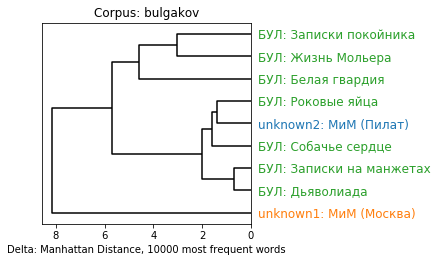

In [6]:
hclust1 = delta.Clustering(manh)
delta.Dendrogram(hclust1).show()

Как видно из дендрограммы, метрика MD определила московские эпизоды "Мастера и Маргариты" в отдельный кластер, достаточно удалённый как от истории Понтия Пилата, так и от других произведений Булгакова. Немосковские эпизоды оказались близки по стилю ранним работам Михаила Афанасьевича (кроме Белой Гвардии).

In [7]:
fclust1 = hclust1.fclustering()
print(fclust1.describe())
print(fclust1.evaluate())

3 clusters of 9 documents (ground truth: 3 groups):
{1: ['unknown2: МиМ (Пилат)', 'БУЛ: Дьяволиада', 'БУЛ: Записки на манжетах',
     'БУЛ: Роковые яйца', 'БУЛ: Собачье сердце'],
 2: ['БУЛ: Белая гвардия', 'БУЛ: Жизнь Мольера', 'БУЛ: Записки покойника'],
 3: ['unknown1: МиМ (Москва)']}

Cluster Errors         1.000000
Adjusted Rand Index    0.150442
Homogeneity            0.593410
Completeness           0.433069
V Measure              0.500717
Purity                 0.888889
Entropy                0.253048
dtype: float64


### Euclidean Distance
Теперь рассмотрим метрику Евклидова расстояния.

In [8]:
euc

,unknown1_МиМ (Москва),unknown2_МиМ (Пилат),БУЛ_Белая гвардия,БУЛ_Дьяволиада,БУЛ_Жизнь Мольера,БУЛ_Записки на манжетах,БУЛ_Записки покойника,БУЛ_Роковые яйца,БУЛ_Собачье сердце
unknown1_МиМ (Москва),0.000000,5404.113156,2559.711507,6125.300809,3486.025100,6312.193121,3946.588654,5363.568588,5195.956216
unknown2_МиМ (Пилат),5404.113156,0.000000,3427.675306,860.674735,2347.494835,1019.191346,1809.715724,512.428532,729.109045
БУЛ_Белая гвардия,2559.711507,3427.675306,0.000000,4081.660814,1870.850074,4278.547300,2309.130356,3352.795103,3242.207890
БУЛ_Дьяволиада,6125.300809,860.674735,4081.660814,0.000000,3010.236037,385.271333,2470.697472,877.049600,1155.254517
БУЛ_Жизнь Мольера,3486.025100,2347.494835,1870.850074,3010.236037,0.000000,3182.154459,1499.130748,2280.105919,2184.460116
БУЛ_Записки на манжетах,6312.193121,1019.191346,4278.547300,385.271333,3182.154459,0.000000,2606.783842,1055.685559,1303.619960
БУЛ_Записки покойника,3946.588654,1809.715724,2309.130356,2470.697472,1499.130748,2606.783842,0.000000,1806.832588,1618.133802
БУЛ_Роковые яйца,5363.568588,512.428532,3352.795103,877.049600,2280.105919,1055.685559,1806.832588,0.000000,670.175350
БУЛ_Собачье сердце,5195.956216,729.109045,3242.207890,1155.254517,2184.460116,1303.619960,1618.133802,670.175350,0.000000


In [9]:
euc.evaluate()

F-Ratio         0.212150
Fisher's LD     0.643590
Simple Score    0.683713
dtype: float64

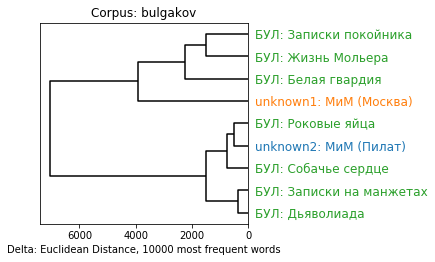

In [10]:
hclust2 = delta.Clustering(euc)
delta.Dendrogram(hclust2).show()

Дендрограмма, построенна на метрике ED, выделяет схожие кластеры, что и MD, с тем отличием, что теперь московские эпизоды "Мастера и Маргариты" не оказались обособлены, а попали в кластер "Белая гвардия/Жизнь г-на де Мольера/Записки покойника". Второй кластер остался без изменений.

In [11]:
fclust2 = hclust2.fclustering()
print(fclust2.describe())
print(fclust2.evaluate())

3 clusters of 9 documents (ground truth: 3 groups):
{1: ['unknown2: МиМ (Пилат)', 'БУЛ: Дьяволиада', 'БУЛ: Записки на манжетах',
     'БУЛ: Роковые яйца', 'БУЛ: Собачье сердце'],
 2: ['БУЛ: Белая гвардия', 'БУЛ: Жизнь Мольера', 'БУЛ: Записки покойника'],
 3: ['unknown1: МиМ (Москва)']}

Cluster Errors         1.000000
Adjusted Rand Index    0.150442
Homogeneity            0.593410
Completeness           0.433069
V Measure              0.500717
Purity                 0.888889
Entropy                0.253048
dtype: float64


### Cosine Delta
И последней метрикой проанализирована косинусная мера близости.

In [14]:
distances

,unknown1_МиМ (Москва),unknown2_МиМ (Пилат),БУЛ_Белая гвардия,БУЛ_Дьяволиада,БУЛ_Жизнь Мольера,БУЛ_Записки на манжетах,БУЛ_Записки покойника,БУЛ_Роковые яйца,БУЛ_Собачье сердце
unknown1_МиМ (Москва),0.000000,1.319228,0.927002,1.518300,1.073689,1.569273,1.029621,1.355783,1.273574
unknown2_МиМ (Пилат),1.319228,0.000000,1.305735,0.765781,1.135117,0.740713,1.162981,0.922069,0.985314
БУЛ_Белая гвардия,0.927002,1.305735,0.000000,1.327742,1.183373,1.348100,1.168050,1.254293,1.244333
БУЛ_Дьяволиада,1.518300,0.765781,1.327742,0.000000,1.238666,0.428605,1.157999,0.739989,0.822654
БУЛ_Жизнь Мольера,1.073689,1.135117,1.183373,1.238666,0.000000,1.178630,1.067915,1.197119,1.203591
БУЛ_Записки на манжетах,1.569273,0.740713,1.348100,0.428605,1.178630,0.000000,1.130037,0.749760,0.827936
БУЛ_Записки покойника,1.029621,1.162981,1.168050,1.157999,1.067915,1.130037,0.000000,1.140126,1.133252
БУЛ_Роковые яйца,1.355783,0.922069,1.254293,0.739989,1.197119,0.749760,1.140126,0.000000,0.932744
БУЛ_Собачье сердце,1.273574,0.985314,1.244333,0.822654,1.203591,0.827936,1.133252,0.932744,0.000000


In [15]:
distances.evaluate()

F-Ratio         0.450481
Fisher's LD     3.718022
Simple Score    0.286535
dtype: float64

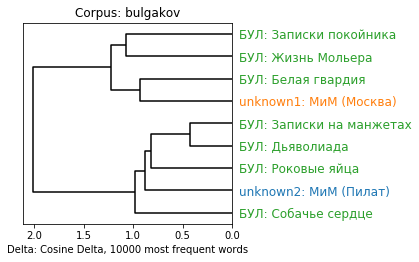

In [16]:
hclust3 = delta.Clustering(distances)
delta.Dendrogram(hclust3).show()

Здесь история похожа на предыдущую метрику, ED, разве что расстояния внутри элементов второго кластера перерассчитаны по-иному.

In [17]:
fclust3 = hclust3.fclustering()
print(fclust3.describe())
print(fclust3.evaluate())

3 clusters of 9 documents (ground truth: 3 groups):
{1: ['unknown2: МиМ (Пилат)', 'БУЛ: Дьяволиада', 'БУЛ: Записки на манжетах',
     'БУЛ: Роковые яйца', 'БУЛ: Собачье сердце'],
 2: ['unknown1: МиМ (Москва)', 'БУЛ: Белая гвардия'],
 3: ['БУЛ: Жизнь Мольера', 'БУЛ: Записки покойника']}

Cluster Errors         2.000000
Adjusted Rand Index    0.000000
Homogeneity            0.368130
Completeness           0.252963
V Measure              0.299869
Purity                 0.777778
Entropy                0.393254
dtype: float64


## Выводы
Результаты всех трёх метрик сходятся в одном: стили написания разных частей романа "Мастер и Маргарита" действительно отличаются друг от друга (по крайней мере, если опираться на статистический анализ частотности слов).

Можно ли говорить о том, что какая-то из частей написана не Михаилом Афанасьевичем? С точки зрения методов стилометрии, применённых в эксперименте, эпизоды, раскрывающие историю Иешуа Га-Ноцри и Понтия Пилата, достаточно близки работам автора периода 1923–25 гг. (за исключением "Белой гвардии"). Московские эпизоды романа, будучи отдалены от прочих (особенно заметно на метрике манхэттенского расстония), так или иначе больше похожи на поздние работы Булгакова и – что неожиданно – на "Белую гвардию".

Возможно, такие результаты кластеризации связаны с небольшим объёмом анализируемого корпуса (Булгаков оставил после себя не так уж и много повестей и романов), но скорее всего объяснение кроется в том, что главы "Мастера и Маргариты" (в большей мере – московские эпизоды) многократно переписывались в течение 1929-1940 гг., вплоть до самой смерти писателя.

Таким образом, обе части романа с большой вероятностью написаны Михаилом Афанасьевичем, однако стилистически разнятся и могут быть отнесены к разным периодам его творчества.

## Библиография
1. S. Argamon. [Interpreting Burrows’s Delta: Geometric and Probabilistic Foundations,](https://academic.oup.com/dsh/article-abstract/23/2/131/1005964) Literary and linguistic computing, vol. 23, iss. 2, pp. 131-147, 2008
2. Evert, Stefan, Proisl, Thomas. [Understanding and explaining Delta measures for authorship attribution](https://academic.oup.com/dsh/article/32/suppl_2/ii4/3865676), Digital Scholarship in the Humanities, Vol. 32, Supplement 2, 2017